In [23]:
import numpy as np
import pandas as pd

In [24]:
import seaborn as sns

In [25]:
df = sns.load_dataset('iris')

In [26]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [27]:
## Linear regression solves binary classification so we need to drop 1 specie 
df = df[df['species']!='setosa']

In [28]:
df['species'].unique()

array(['versicolor', 'virginica'], dtype=object)

In [29]:
df['species'] = df['species'].map({'virginica':0, 'versicolor': 1})

In [30]:
## Features into independent and dependent features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [31]:
X

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [32]:
y

50     1
51     1
52     1
53     1
54     1
      ..
145    0
146    0
147    0
148    0
149    0
Name: species, Length: 100, dtype: int64

In [33]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [44]:
from sklearn.model_selection import GridSearchCV

parameter = {'C': [0.5,1,3,5,6,7,9,10,30,45], 'penalty': ['l1', 'l2', 'elasticnet'] }

log_regressor = GridSearchCV(regression, parameter, scoring='accuracy', cv = 5)

log_regressor.fit(X_train, y_train)

C:\Users\ashwin.prabhu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ashwin.prabhu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ashwin.prabhu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ashwin.prabhu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 3, 5, 6, 7, 9, 10, 30, 45],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [45]:
print(log_regressor.best_params_)

{'C': 6, 'penalty': 'l2'}


In [37]:
# Accuracy
print(log_regressor.best_score_)

0.9875


In [38]:
prediction_log = log_regressor.predict(X_test)

In [39]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,0.553855,0.828479,0.593709,-0.494305
sepal_width,0.553855,1.000000,0.519802,0.566203,-0.308080
petal_length,0.828479,0.519802,1.000000,0.823348,-0.786424
petal_width,0.593709,0.566203,0.823348,1.000000,-0.828129
species,-0.494305,-0.308080,-0.786424,-0.828129,1.000000


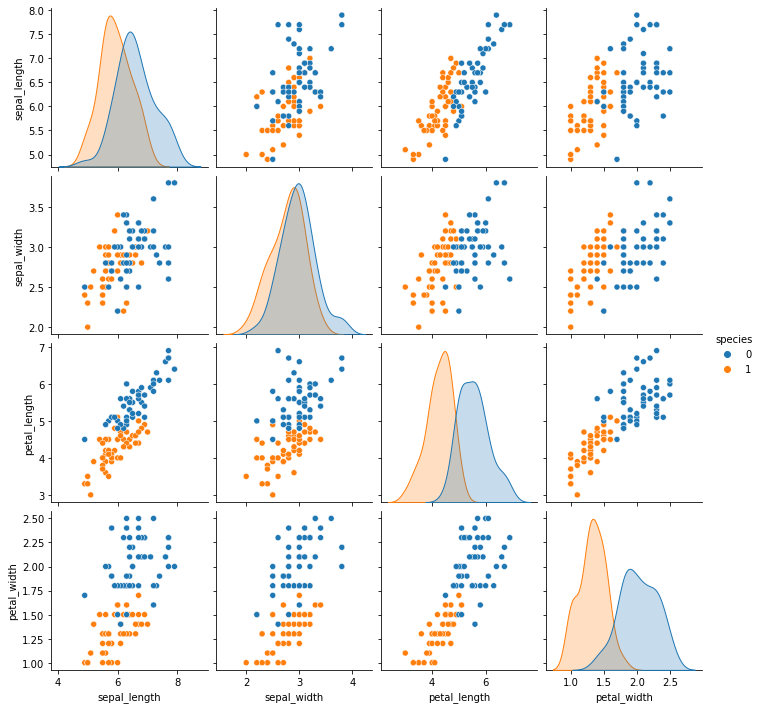

In [46]:
sns.pairplot(df, hue='species')

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, roc_auc_score, f1_score, fbeta_score

In [42]:
confusion_matrix(y_test, prediction_log)

array([[ 8,  0],
       [ 2, 10]], dtype=int64)

In [43]:
f1_score(y_test, prediction_log)

0.9090909090909091